# Setting up all the data needed for training and testing.

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("data", train=True, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("data", train=False, download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 10

train_set = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)

# Importing libraries to help us build and train NN.

In [2]:
import torch.nn as nn
import torch.nn.functional as F

# OOP - Building a NN class inheriting from nn.Module.

In [3]:
class NeuralNet(nn.Module):
    def __init__(self):
        
        # In python, only the attributes and the methods are inherited from the base class.
        # The constructor/__init__ of the base class will not be automatically called.
        # Therefore, if we want to call the base class' (nn.Module) constructor/__init__,
        # swe must do so explicitly in the derived class (NeuralNet).
        super().__init__()
        
        # Since we will be inputting MNIST dataset into our NN, the number of input nodes
        # will be 28*28 = 784
        input_layer_neuron_count = 784
        
        # We are planning to set up a fully connected network with 3 hidden layers with 64
        # neurons each. The output of the NN will have 10 neurons - 1 for each digit.
        # nn.Linear means a column of neurons that will be fully connected.
        
        hidden_layer_1_neuron_count = 64
        hidden_layer_2_neuron_count = 64
        hidden_layer_3_neuron_count = 64
        output_layer_neuron_count = 10
        
        self.in_L1 = nn.Linear(input_layer_neuron_count, hidden_layer_1_neuron_count)
        self.L1_L2 = nn.Linear(hidden_layer_1_neuron_count, hidden_layer_2_neuron_count)
        self.L2_L3 = nn.Linear(hidden_layer_2_neuron_count, hidden_layer_3_neuron_count)
        self.L3_out = nn.Linear(hidden_layer_3_neuron_count, output_layer_neuron_count)

    def forward(self, x):
        
        l1 = self.in_L1(x)
        l1_activated = F.relu(l1)
        
        l2 = self.L1_L2(l1_activated)
        l2_activated = F.relu(l2)
        
        l3 = self.L2_L3(l2_activated)
        l3_activated = F.relu(l3)
        
        y_hat = self.L3_out(l3_activated)
        
        # Converting the output to a classification confidence score across 10 classes
        # by using softmax.
        y_hat = F.log_softmax(y_hat, dim=1)
        
        return y_hat
        
net = NeuralNet()
print(net)

for data in train_set:
    break

batch_data = data[0][0]
y_hat = net(batch_data[0].view(1, 784))
print(y_hat)

NeuralNet(
  (in_L1): Linear(in_features=784, out_features=64, bias=True)
  (L1_L2): Linear(in_features=64, out_features=64, bias=True)
  (L2_L3): Linear(in_features=64, out_features=64, bias=True)
  (L3_out): Linear(in_features=64, out_features=10, bias=True)
)
tensor([[-2.2735, -2.2507, -2.2208, -2.4208, -2.3247, -2.2569, -2.3567, -2.3664,
         -2.3265, -2.2474]], grad_fn=<LogSoftmaxBackward>)


# Setting up optmizer for backpropagation/learning

In [4]:
import torch.optim as optim

# Creating an optimizer object and pass in the parameters of our neural net to be optimized.
# In this case, we are using Adam = AdaGrad + RMSProp optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 10
for epoch in range(EPOCHS):
    for batch_data in train_set:
        
        X, y = batch_data
        
        # In PyTorch, for every mini-batch during the training phase, we need to explicitly
        # set the gradients to zero before starting to do backpropragation (i.e., updation
        # of Weights and biases) because PyTorch accumulates the gradients on subsequent
        # backward passes. This is convenient while training RNNs. So, the default action has
        # been set to accumulate (i.e. sum) the gradients on every loss.backward() call.
        # Because of this, when you start your training loop, ideally you should zero out the
        # gradients so that you do the parameter update correctly. Else the gradient would
        # point in some other direction than the intended direction towards the minimum (or
        # maximum, in case of maximization objectives).
        net.zero_grad()
        
        y_hat = net(X.view(BATCH_SIZE, 784))
        
        loss = F.nll_loss(y_hat, y)    # negative log-likelihood loss
        # loss = F.mse_loss(y_hat, y)  # mean squared error
        loss.backward()
        
        optimizer.step()
    
    print(loss)
        

tensor(0.2348, grad_fn=<NllLossBackward>)
tensor(0.0461, grad_fn=<NllLossBackward>)
tensor(0.0879, grad_fn=<NllLossBackward>)
tensor(0.0056, grad_fn=<NllLossBackward>)
tensor(3.3699e-05, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)
tensor(1.1560, grad_fn=<NllLossBackward>)
tensor(0.0124, grad_fn=<NllLossBackward>)
tensor(0.0555, grad_fn=<NllLossBackward>)
tensor(0.0001, grad_fn=<NllLossBackward>)


In [5]:
correct = 0
total = 0

with torch.no_grad():
    for batch_data in test_set:
        X, y = batch_data
        output = net(X.view(BATCH_SIZE, 784))
        
        for idx, i in enumerate(output):
            max_argument = torch.argmax(i)
            if max_argument == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", correct * 100 / total)

# import numpy as np
# l = np.array([1,2,5,4,3])
# print(np.argmax(l))

Accuracy:  97.39


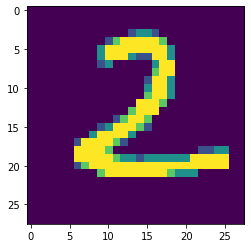

tensor(2)


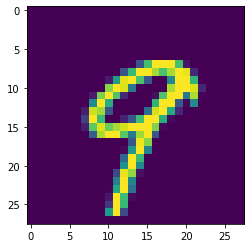

tensor(9)


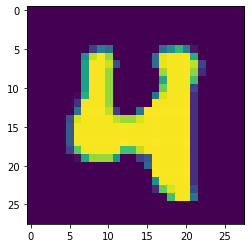

tensor(4)


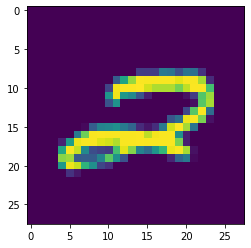

tensor(2)


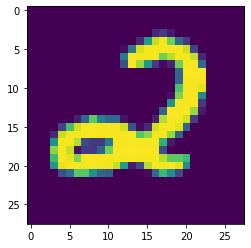

tensor(2)


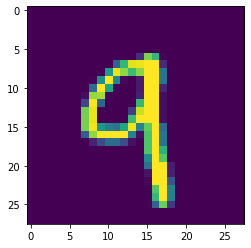

tensor(9)


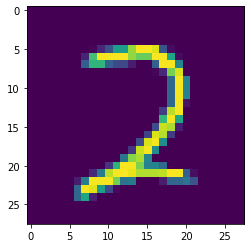

tensor(2)


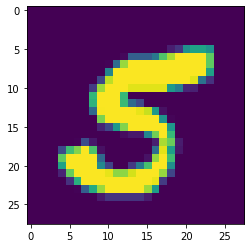

tensor(5)


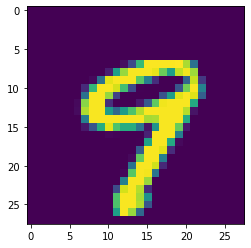

tensor(9)


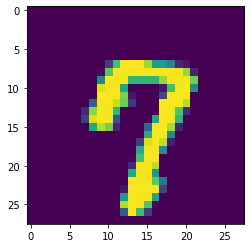

tensor(7)


In [16]:
import matplotlib.pyplot as plt

for i in range(BATCH_SIZE):
    plt.imshow(X[i].view(28, 28))
    plt.show()
    print(torch.argmax(output[i]))